In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math

In [2]:
#Setting constants
solar_metallicity = 0.0134
p = 0.006

In [3]:
# Create numpy array from -3 to 1 in increments of 0.01
metallicity_values = np.arange(-3,1,0.01)

Rearranging 
$$
[\frac{M}{H}] = log_{10}(\frac{Z}{Z_{\odot}})
$$ 

for Z gives:

$$
Z = Z_{\odot} * 10^{[\frac{M}{H}]}
$$

where 
$$
Z_{\odot} \sim 0.0134
$$

In [4]:
# Calculate Z using above equation
Z = solar_metallicity*10**metallicity_values

$$
\frac{dN}{d[\frac{M}{H}]} \propto  Z exp(\frac{-Z}{p})
$$

Using : 
p ~ 0.006 and the Z array calculated above

Text(0, 0.5, 'dN/d[M/H]')

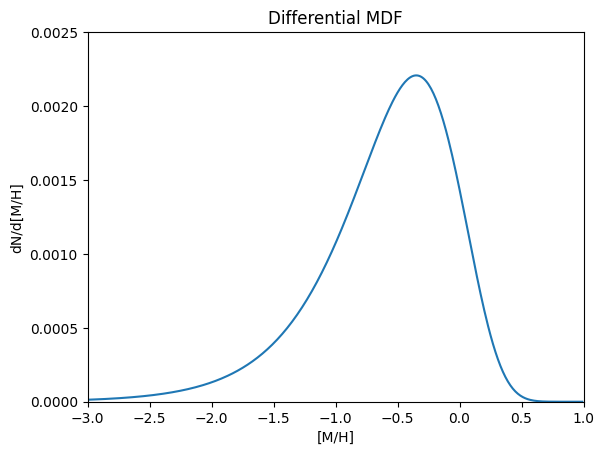

In [5]:
MDF = Z * np.exp(-Z/p)
plt.plot(metallicity_values, MDF)

plt.xlim(-3,1)
plt.ylim(0,0.0025)

#plot laelling
plt.title("Differential MDF")
plt.xlabel('[M/H]')
plt.ylabel("dN/d[M/H]")

Text(0, 0.5, 'dN/d[M/H]')

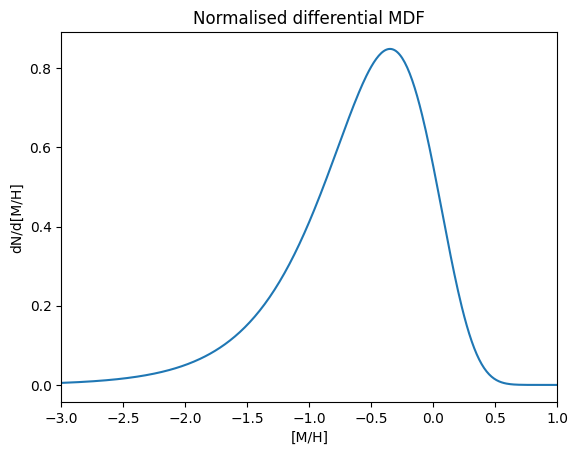

In [6]:
# normalise the MDF
MDF /= np.sum(MDF)*(metallicity_values[1]-metallicity_values[0])
plt.plot(metallicity_values, MDF)

plt.xlim(-3,1)

plt.title("Normalised differential MDF")
plt.xlabel('[M/H]')
plt.ylabel("dN/d[M/H]")

In [9]:
def get_data_column(data, col):
    """
    A function that reads in a data file and returns a selected column from the data table

    Inputs
    - data: STR, name of data file to read in 
    - col: INT, index of column to return

    Returns:
    column: Series, column from pandas dataframe
    """
    df = pd.read_table(data, header=None, sep='\s+')
    column = df.iloc[:,col]

    return column

#Use above function to return magnesium abundance column from Adibekyan data file
Mg = get_data_column("adibekyan.dat", 9).to_numpy()

Mg_sorted = np.sort(Mg)

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gaming\AppData\Local\Temp\ipykernel_27560\2871239720.py:12: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(data, header=None, sep='\s+')


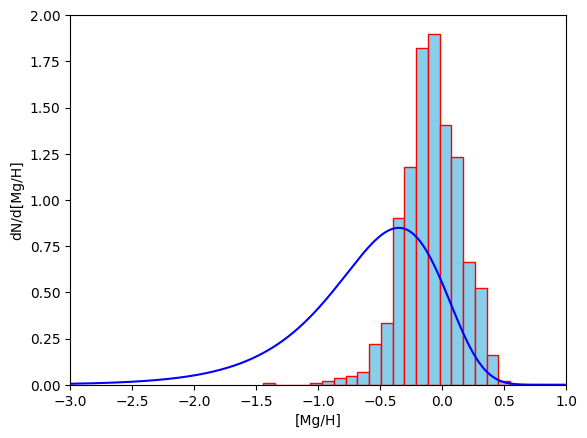

In [10]:
### Combining the CBM plot and Adibekyan data   
fig, axis = plt.subplots()

axis.hist(Mg, bins=21, density=True, color = "skyblue", edgecolor='red', linewidth=1)
axis.plot(metallicity_values, MDF, color="blue")


axis.set_xlabel('[Mg/H]')
axis.set_ylabel('dN/d[Mg/H]')

#set axis limits
axis.set_xlim(-3.0,1.0)
axis.set_ylim(0, 2.0)

axis.set_yticks(np.arange(0, 2.25, 0.25))


plt.show()

assuming that the ISM has an initial abundance $Z_0$:

$$
Z(t) = Z_0 - p * ln[\frac{M_g(t)}{M_g(0)}]
$$

The cumulative MDF is then given by:

$$
N(\leq Z(t)) \propto M_g(0)([1-exp[\frac{Z_0 - Z(t)}{p}])
$$

and 
$ N(\leq Z(t)) = 0$ for Z(t) < $Z_0$


In [11]:
Mg = 1

def calculate_cumulative_MDF(metallicity_values, p_yield, Z_0):
    """
    A function that calculates a metallicity distribution function (MDF) 

    Parameters:
    metallicity_values: numpy array from -3 to 1 in steps of 0.01
    P: float, yield,
    Z_0: float, pre-enrichment value

    Returns 
    cumul_MDF: numpy array that can be plotted to show a cumulative distribution of the MDF
    """

    #calculate Z
    Z = solar_metallicity*10**metallicity_values

    # N(<= Z(t)) = 0 if Z < Z_0
    if Z.sum() < Z_0:
        cumul_MDF = 0
    else:
        #cumul_MDF = Mg * (1-np.exp(Z_0 - Z/p_yield))
        cumul_MDF = 1 - np.exp((Z_0 - Z)/p_yield)


    #normalise cumulative MDF

    cumul_MDF /= cumul_MDF[-1]

    return cumul_MDF

0.0044666666666666665


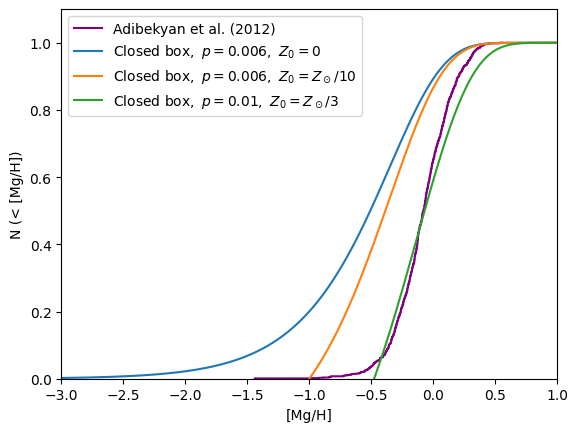

In [13]:
print(solar_metallicity/3)
cumul_MDF = calculate_cumulative_MDF(metallicity_values, 0.006, 0) # p=0.006, Z_0=0
cumul_MDF_2 = calculate_cumulative_MDF(metallicity_values, 0.006, solar_metallicity/10) # p=0.006, Z_0= 1/10 of solar metallicity
cumul_MDF_3 = calculate_cumulative_MDF(metallicity_values, 0.01, solar_metallicity/3) # p=0.009, Z_0=1/3 of solar metallicity
fig, axes = plt.subplots()

axes.ecdf(Mg_sorted, color="purple", label="Adibekyan et al. (2012)")
axes.plot(metallicity_values, cumul_MDF, label=r"$\mathrm{Closed\ box},\ p = 0.006,\ Z_0 = 0$")
axes.plot(metallicity_values, cumul_MDF_2, label=r"$\mathrm{Closed\ box},\ p = 0.006,\ Z_0 = Z_\odot/10$")
axes.plot(metallicity_values, cumul_MDF_3, label=r"$\mathrm{Closed\ box},\ p = 0.01,\ Z_0 = Z_\odot/3$")


axes.set_xlabel('[Mg/H]')
axes.set_ylabel('N (< [Mg/H])')
axes.set_xlim(-3, 1)
axes.set_ylim(0,1.1)

axes.legend()
plt.show()